In [ ]:
''''Assignment #2
Rezwan-Ul-Alam (ID: 2011659042)
Md. Nur Alam Jowel (ID: 2012355042)
Raian Ruku (ID: 2013409642)'''

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [4]:
data = pd.read_excel('/content/gdrive/MyDrive/data/air.xlsx')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


# Data PreProcessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [6]:
data['NMHC(GT)'] = data['NMHC(GT)'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [7]:
df = data.drop(['Date', 'Time','T','RH'], axis=1)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),AH
0,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,0.757754
1,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,0.725487
2,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,0.750239
3,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,0.786713
4,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,0.788794


In [8]:
for column in df.columns:
    total = df[column].isnull().sum()
    print(f"Column '{column}' has {total} null values")
    print("\n")

Column 'CO(GT)' has 0 null values


Column 'PT08.S1(CO)' has 0 null values


Column 'NMHC(GT)' has 0 null values


Column 'C6H6(GT)' has 0 null values


Column 'PT08.S2(NMHC)' has 0 null values


Column 'NOx(GT)' has 0 null values


Column 'PT08.S3(NOx)' has 0 null values


Column 'NO2(GT)' has 0 null values


Column 'PT08.S4(NO2)' has 0 null values


Column 'PT08.S5(O3)' has 0 null values


Column 'AH' has 0 null values




In [9]:
check = -200
#checking the presence of -200 in each of the columns
count = {}

for col in df.columns:
    count[col] = (df[col] == check).sum()

# Display the results
for column, count in count.items():
    print(f"Column '{column}' has {check}, {count} times")

Column 'CO(GT)' has -200, 1683 times
Column 'PT08.S1(CO)' has -200, 366 times
Column 'NMHC(GT)' has -200, 8443 times
Column 'C6H6(GT)' has -200, 366 times
Column 'PT08.S2(NMHC)' has -200, 366 times
Column 'NOx(GT)' has -200, 1639 times
Column 'PT08.S3(NOx)' has -200, 366 times
Column 'NO2(GT)' has -200, 1642 times
Column 'PT08.S4(NO2)' has -200, 366 times
Column 'PT08.S5(O3)' has -200, 366 times
Column 'AH' has -200, 366 times


In [10]:
df = df.drop('NMHC(GT)', axis=1) #90% value of this feature is missing, so drop it


In [11]:
df.replace(-200, np.nan, inplace=True)
df.isnull().sum()

CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
AH                366
dtype: int64

In [12]:
for col in df.columns:
    mean = df[col].astype(float).mean()
    df[col].replace(np.nan, mean, inplace=True)

In [13]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.152750,1099.707856,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,1.025530
std,1.316068,212.796116,7.302474,261.557856,193.419417,251.741784,43.911095,339.365351,390.609000,0.395836
min,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,0.184679
25%,1.200000,941.250000,4.591495,742.500000,112.000000,665.500000,85.900000,1241.500000,741.750000,0.746115
50%,2.152750,1074.500000,8.593367,923.250000,229.000000,817.500000,113.075515,1456.143486,982.500000,1.015441
75%,2.600000,1221.250000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,1.296223
max,11.900000,2039.750000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,2.231036


In [14]:
df_copy = df.copy()
df1 = np.array(df_copy)
df1.shape

(9357, 10)

# Train Test Split

In [15]:
import math
first_75 = math.ceil(0.75*len(df1))
print(first_75)

7018


In [16]:
data_train = df1[:first_75, :] #first 75% of the data
data_test = df1[first_75:, :] #last 25% of the data
print(f"Shape of training data{data_train.shape}\n")
print(f"Shape of training data{data_test.shape}")

Shape of training data(7018, 10)

Shape of training data(2339, 10)


In [17]:
x_train = data_train[:, :-1]  # First 10 columns
y_train = data_train[:, -1]   # Last column
x_test = data_test[:, :-1]  # First 10 columns
y_test = data_test[:, -1]   # Last column
print(x_train.shape)
print(y_train)
print(x_test.shape)
print(y_test)

(7018, 9)
[0.75775383 0.72548745 0.75023907 ... 0.86006183 0.83227527 0.83434514]
(2339, 9)
[0.83968237 0.8020108  0.8137702  ... 0.64064877 0.51386592 0.50280371]


# Cost,Grad Des, grad compute

In [20]:
def compute_cost(X, y, w, b):

    m = X.shape[0] # Here X is a metrix(not vector) with m example and n features.
    cost = 0.0

    for i in range(m):
        f_wb = np.dot(X[i], w) + b    # w is a vector in this case, not scalar. So, we use np.dot() for product
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost


def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): m number of examples, n number of features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m = X.shape[0] # number of examples
    n = X.shape[1] # number of features
    dj_dw = np.zeros((n,)) # array of zeroes with size = n(total number of feature)
    dj_db = 0.

    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        common = f_wb - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + common * X[i, j]
        dj_db = dj_db + common
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [21]:
def gradient_descent(X, y, w_in, b_in,  alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))  : m examples, n features
      y (ndarray (m,))  : target values
      w_in (ndarray(n,)) : initial values of model parameters
      b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    p_history = []
    b = b_in
    #w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_db, dj_dw = gradient_function(X, y, w , b)

        # Update Parameters using equation (3) above
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
          print(f"Iteration {i:4}: Cost {J_history[-1]:8.2f} ",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w}, b:{b: 0.5e}")

    return w, b, J_history,p_history #return w and J,w history for graphing

# 1.0e-7

In [22]:
# initialize parameters

w_init =  np.array([0,0,0,0,0,0,0,0,0])

b_init = 0.
# some gradient descent settings
iterations = 1000
tmp_alpha = 1.0e-7 #7,8,9,10 ; 9 giving a better result
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init,tmp_alpha,
                                                    iterations,compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent (alpha = {tmp_alpha:.1e}): ({w_final},{b_final:8.4f})")




Iteration    0: Cost     0.15  dj_dw: [   -2.49090091 -1263.93196763   -12.44697413 -1109.56003473
  -251.96851116  -944.66541284  -116.56818188 -1827.47018324
 -1170.09326067], dj_db: -1.143e+00   w: [2.49090091e-07 1.26393197e-04 1.24469741e-06 1.10956003e-04
 2.51968511e-05 9.44665413e-05 1.16568182e-05 1.82747018e-04
 1.17009326e-04], b: 1.14278e-07
Iteration  100: Cost     0.05  dj_dw: [  0.08369106   4.03251749   0.47470547   9.46450812   5.61976467
   4.75147073   2.78309034 -21.37540553  13.53833794], dj_db: -9.739e-03   w: [-7.21403548e-07  1.39468749e-04 -4.34097359e-06  4.49481938e-05
 -6.92442026e-05  1.89493390e-04 -1.64395855e-05  5.36321071e-04
 -4.14774991e-05], b: 3.11181e-07
Iteration  200: Cost     0.05  dj_dw: [  0.06656137   2.74880341   0.41120342   7.97198099   1.04434353
   6.45773774   2.12463039 -15.5537572    7.417943  ], dj_db: -8.776e-03   w: [-1.45485463e-06  1.06329128e-04 -8.66978142e-06 -4.03178287e-05
 -9.92149014e-05  1.26941463e-04 -4.05770372e-05  7

In [69]:
for i in range(5):
  print(f"alpha: {tmp_alpha:.1e}, target value: {y_test[i]:0.2f}, predicted value: {np.dot(x_test[i], w_final) + b_final:0.2f}")

alpha: 1.0e-07, target value: 0.84, predicted value: 0.77
alpha: 1.0e-07, target value: 0.80, predicted value: 0.77
alpha: 1.0e-07, target value: 0.81, predicted value: 0.77
alpha: 1.0e-07, target value: 0.88, predicted value: 0.82
alpha: 1.0e-07, target value: 0.90, predicted value: 0.94


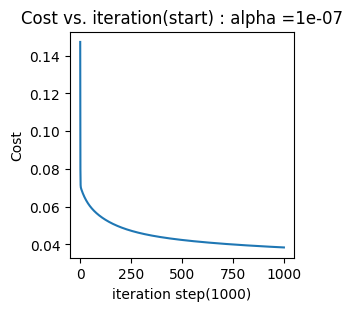

In [24]:
# plot cost versus iteration
fig, (ax1) = plt.subplots(1, 1, constrained_layout=True, figsize=(3,3))
ax1.plot(J_hist[:iterations])
ax1.set_title(f"Cost vs. iteration(start) : alpha ={tmp_alpha}");
ax1.set_ylabel('Cost')            ;
ax1.set_xlabel(f'iteration step({iterations})')  ;
plt.show()

# Regularization

In [46]:
df.head()


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,0.788794


In [52]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    m  = X.shape[0]
    n  = len(w)
    cost = 0.0
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        cost = cost + (f_wb - y[i])**2
    cost = cost / (2 * m)

    regg_term = 0.0

    for j in range(n):
        regg_term = regg_term + (w[j]**2)
    regg_term = (lambda_/(2*m)) * regg_term

    total_cost = cost + regg_term
    return total_cost


def compute_gradient_linear_reg(X, y, w, b, lambda_):
    m = X.shape[0] # number of examples
    n = X.shape[1] # number of features
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        common = f_wb - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + common * X[i, j]
        dj_db = dj_db + common
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw


def gradient_descent_linear_reg(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

# tmp_alpha = 1.0e-7, and lambda =0.1


In [62]:
# initialize parameters

w_init =  np.array([0,0,0,0,0,0,0,0,0])

b_init = 0.
# some gradient descent settings
iterations = 1000
tmp_alpha = 1.0e-7 #7,8,9,10 ; 9 giving a better result
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent_linear_reg(x_train ,y_train, w_init, b_init,compute_cost_linear_reg, compute_gradient_linear_reg,
                                                      tmp_alpha,iterations,0.1)
print(f"(w,b) found by gradient descent (alpha = {tmp_alpha:.1e}): ({w_final},{b_final:8.4f})")




Iteration    0: Cost     0.15   
Iteration  100: Cost     0.05   
Iteration  200: Cost     0.05   
Iteration  300: Cost     0.05   
Iteration  400: Cost     0.04   
Iteration  500: Cost     0.04   
Iteration  600: Cost     0.04   
Iteration  700: Cost     0.04   
Iteration  800: Cost     0.04   
Iteration  900: Cost     0.04   
Iteration  999: Cost     0.04   
(w,b) found by gradient descent (alpha = 1.0e-07): ([-6.03162996e-06  2.17091790e-05 -3.97709968e-05 -5.67590001e-04
  1.18023580e-04 -7.55960709e-05 -1.49884587e-04  1.28344728e-03
 -2.82695313e-04],  0.0000)


In [67]:
for i in range(5):
    print(f" alpha:{tmp_alpha}, target value: {y_test[i]:0.2f}, predicted value: {np.dot(x_test[i], w_final) + b_final:0.2f}")

 alpha:1e-07, target value: 0.84, predicted value: 0.77
 alpha:1e-07, target value: 0.80, predicted value: 0.77
 alpha:1e-07, target value: 0.81, predicted value: 0.77
 alpha:1e-07, target value: 0.88, predicted value: 0.82
 alpha:1e-07, target value: 0.90, predicted value: 0.94


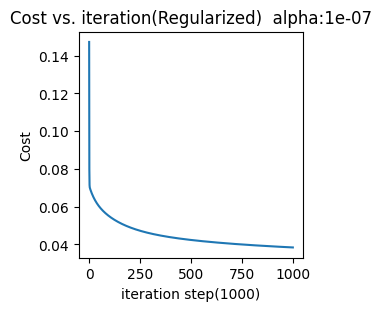

In [70]:
# plot cost versus iteration
fig, (ax1) = plt.subplots(1, 1, constrained_layout=True, figsize=(3,3))
ax1.plot(J_hist[:iterations])
ax1.set_title(f"Cost vs. iteration(Regularized)  alpha:{tmp_alpha}");
ax1.set_ylabel('Cost')            ;
ax1.set_xlabel(f'iteration step({iterations})')  ;
plt.show()